<a href="https://colab.research.google.com/github/Jagathish67/NM-PROJECT/blob/main/twitter_sentiment_extaction_analysis_eda_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necesseties

In [ ]:
import re
import string
from textblob import TextBlob
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Jagathish67/Decoding-emotions-through-sentiment-analysis-of-social-media-conversations/main/submission.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Jagathish67/Decoding-emotions-through-sentiment-analysis-of-social-media-conversations/main/submission.csv')
ss = pd.read_csv('https://raw.githubusercontent.com/Jagathish67/Decoding-emotions-through-sentiment-analysis-of-social-media-conversations/main/submission.csv')

In [ ]:
print(train.head())

       textID                                      selected_text
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh
1  96d74cb729                                           exciting
2  eee518ae67                                          Recession
3  01082688c6                                        happy bday!
4  33987a8ee5                                        I like it!!


In [ ]:
print(train.shape)
print(test.shape)

(3534, 2)
(3534, 2)


In [ ]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         3534 non-null   object
 1   selected_text  3534 non-null   object
dtypes: object(2)
memory usage: 55.3+ KB


In [ ]:
train.dropna(inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         3534 non-null   object
 1   selected_text  3534 non-null   object
dtypes: object(2)
memory usage: 55.3+ KB


In [ ]:
train.head()

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,Recession
3,01082688c6,happy bday!
4,33987a8ee5,I like it!!


In [ ]:
train.describe()

,textID,selected_text
count,3534,3534
unique,3534,2977
top,469e15c5a8,good
freq,1,50


In [ ]:
print("Actual column names in the dataset:")
print(train.columns.tolist())


Actual column names in the dataset:
['textID', 'selected_text']


In [ ]:
print(f"Total number of predictions: {train.shape[0]}")
temp = train['selected_text'].value_counts().reset_index()
temp.columns = ['selected_text', 'count']
print(temp)
temp.style.background_gradient(cmap='Purples')

Total number of predictions: 3534
                                          selected_text  count
0                                                  good     50
1                                                  love     42
2                                                 Happy     26
3                                                  miss     20
4                                                  hate     18
...                                                 ...    ...
2972                                 still making icons      1
2973  gonna go 2 bed now, night tweeters  , dont thi...      1
2974          Waiting for my turn on wii fit gym closed      1
2975  Omg!!! Is this the sun glimpsing through the c...      1
2976  Heyy.thnxx.or.inviting.me.to.ur.party.rob.ill....      1

[2977 rows x 2 columns]


,selected_text,count
0,good,50
1,love,42
2,Happy,26
3,miss,20
4,hate,18
5,nice,18
6,thanks,18
7,sad,18
8,sorry,18
9,happy,17


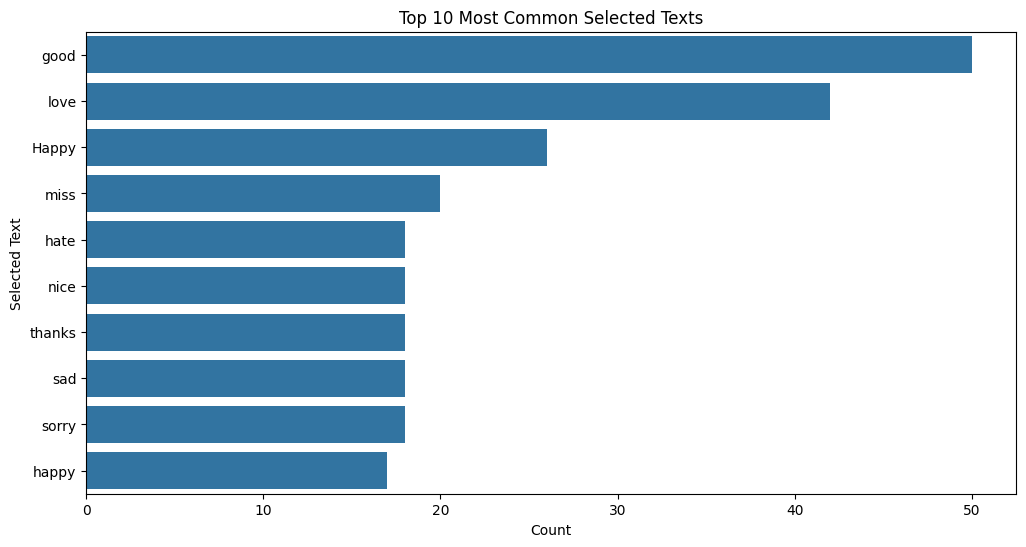

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='selected_text', data=train, order=train['selected_text'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Common Selected Texts')
plt.xlabel('Count')
plt.ylabel('Selected Text')
plt.show()

In [ ]:
fig = go.Figure(go.Funnelarea(
    text = temp['selected_text'].head(10),
    values = temp['count'].head(10),
    title = {"position": "top center", "text": "Funnel-Chart of Top Selected Texts"}
))

fig.show()

In [ ]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
results_jaccard = []

for ind, row in train.iterrows():
    sentence1 = row['selected_text']
    sentence2 = row['selected_text']


    jaccard_score = jaccard(sentence1, sentence2)

    results_jaccard.append([sentence1, sentence2, jaccard_score])

In [ ]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [ ]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [ ]:
train.head()

,textID,selected_text,text,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,8f3fc77f66,- brief interruption- brb. goodnight if i ...,- brief interruption- brb. goodnight if i ...,1.0,15,15,0
1,6a818203a8,GRR! my stupid meebo is disconnecting me e...,GRR! my stupid meebo is disconnecting me e...,1.0,10,10,0
2,27c4e1f089,"I am sending healthy, healing thoughts in ...","I am sending healthy, healing thoughts in ...",1.0,10,10,0
3,c35b8dbb8a,eeek!! Your coming!!!! Im soo excited to s...,eeek!! Your coming!!!! Im soo excited to s...,1.0,11,11,0
4,9a00c7fd06,"Awww, that wasn`t very nice.","Awww, that wasn`t very nice.",1.0,5,5,0


In [ ]:
hist_data = [train['Num_words_ST'],train['Num_word_text']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

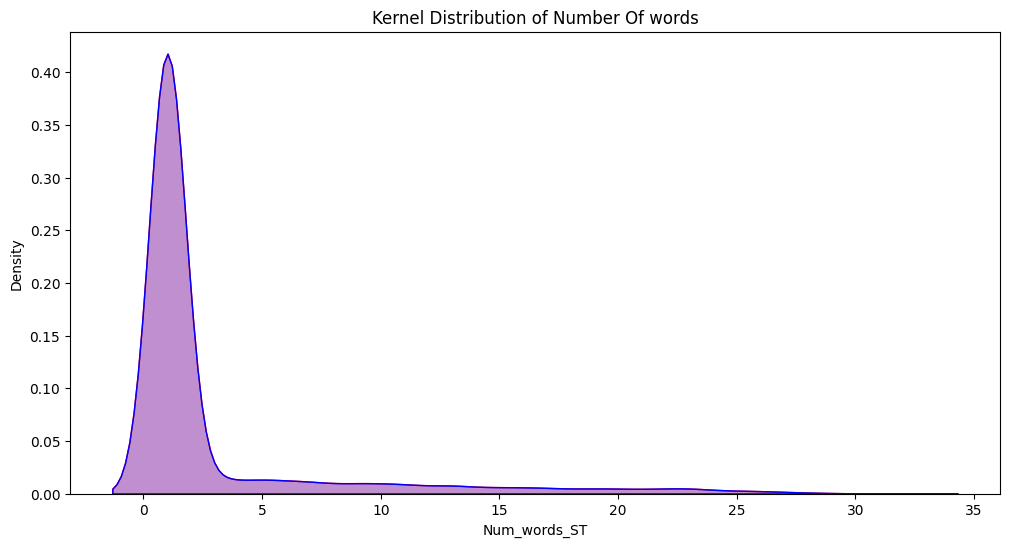

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

           textID                                      selected_text  \
0      8f3fc77f66      - brief interruption- brb. goodnight if i ...   
1      6a818203a8      GRR! my stupid meebo is disconnecting me e...   
2      27c4e1f089      I am sending healthy, healing thoughts in ...   
3      c35b8dbb8a      eeek!! Your coming!!!! Im soo excited to s...   
4      9a00c7fd06                       Awww, that wasn`t very nice.   
...           ...                                                ...   
12397  af087c9deb                                    youre diabetic?   
12398  972dc5787d                         yr very young looking dude   
12399  156816e845                                               yum.   
12400  b847eb1075                                    yummy .. Share!   
12401  3ed3cffe21    yup, def swine flu. I think it was the sausage.   

      sentiment  difference_in_words  
0       neutral                   15  
1      negative                   10  
2      positive   

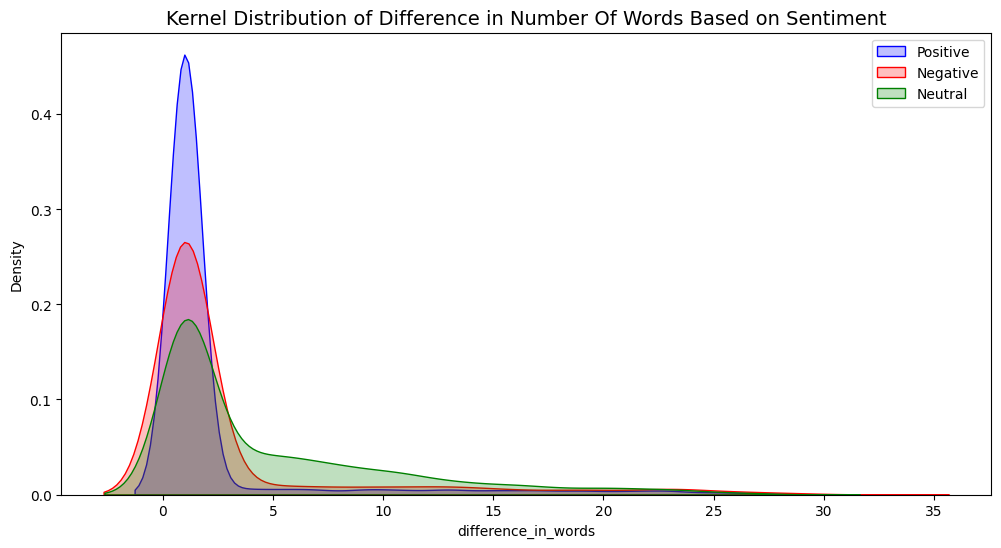

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

train['sentiment'] = train['selected_text'].apply(get_sentiment)

train['difference_in_words'] = train['selected_text'].apply(lambda x: len(x.split()))

print(train[['textID', 'selected_text', 'sentiment', 'difference_in_words']])

print(train['sentiment'].value_counts())

plt.figure(figsize=(12, 6))
sns.kdeplot(train[train['sentiment'] == 'positive']['difference_in_words'], shade=True, color="b", label="Positive")
sns.kdeplot(train[train['sentiment'] == 'negative']['difference_in_words'], shade=True, color="r", label="Negative")
sns.kdeplot(train[train['sentiment'] == 'neutral']['difference_in_words'], shade=True, color="g", label="Neutral")

plt.title('Kernel Distribution of Difference in Number Of Words Based on Sentiment', fontsize=14)
plt.legend()
plt.show()

<Axes: xlabel='difference_in_words'>

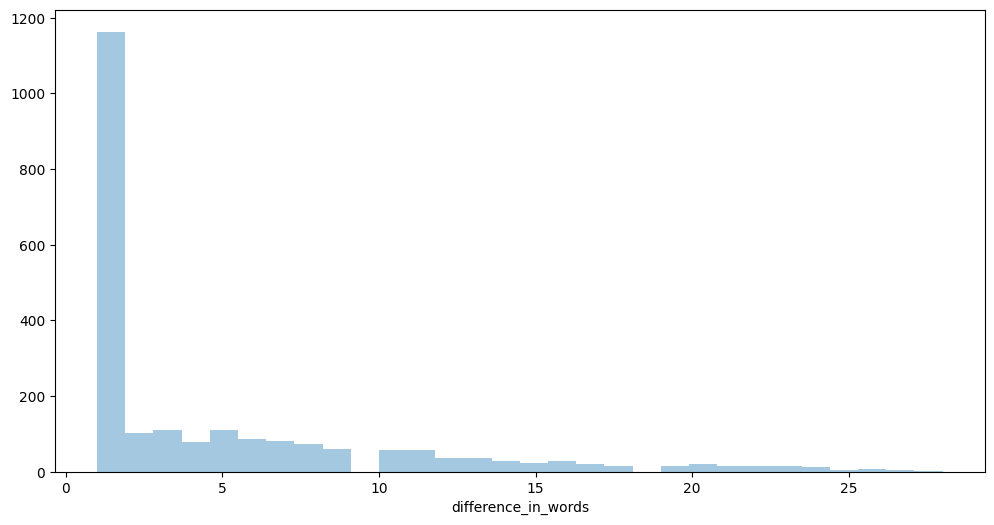

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['difference_in_words'],kde=False)

<Axes: xlabel='jaccard_score'>

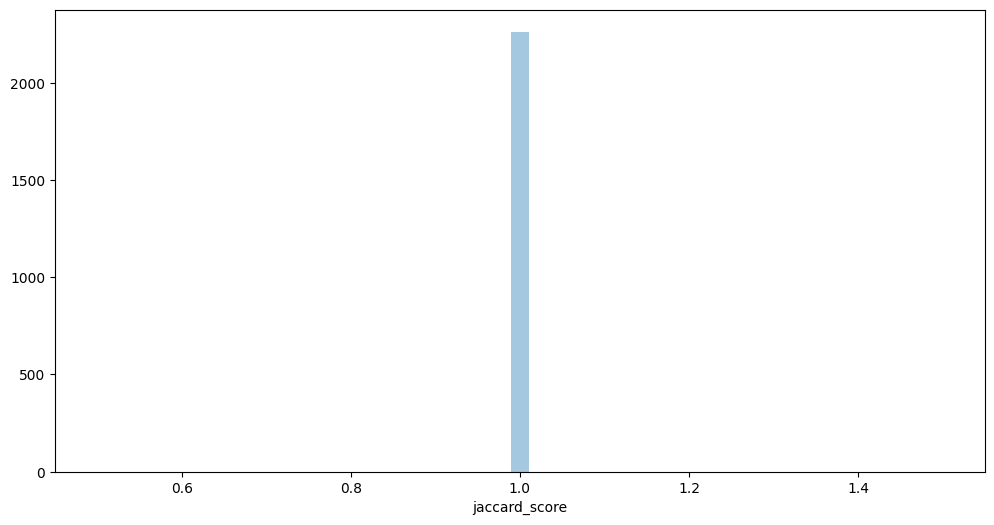

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

In [ ]:
k = train[train['Num_word_text']<=2]

In [ ]:
k[k['sentiment']=='positive']

,textID,selected_text,text,jaccard_score,Num_words_ST,Num_word_text,difference_in_words,sentiment
143,d6738c3768,Excellent point.,Excellent point.,1.0,2,2,2,positive
155,9946895c91,Great idea,Great idea,1.0,2,2,2,positive
182,c3feee17fd,How lovely,How lovely,1.0,2,2,2,positive
302,455ef3e9b6,LOL thx,LOL thx,1.0,2,2,2,positive
366,dfa577d3c1,Thanks Ennio,Thanks Ennio,1.0,2,2,2,positive
...,...,...,...,...,...,...,...,...
12348,17d18ba9ef,wonderful,wonderful,1.0,1,1,1,positive
12349,17d18ba9ef,wonderful,wonderful,1.0,1,1,1,positive
12350,ad0dd05c20,wonderful,wonderful,1.0,1,1,1,positive
12351,ad0dd05c20,wonderful,wonderful,1.0,1,1,1,positive


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [ ]:
train.head()

,textID,selected_text,text,jaccard_score,Num_words_ST,Num_word_text,difference_in_words,sentiment
0,8f3fc77f66,brief interruption brb goodnight if i don...,brief interruption brb goodnight if i don...,1.0,15,15,15,neutral
1,6a818203a8,grr my stupid meebo is disconnecting me ev...,grr my stupid meebo is disconnecting me ev...,1.0,10,10,10,negative
2,27c4e1f089,i am sending healthy healing thoughts in t...,i am sending healthy healing thoughts in t...,1.0,10,10,10,positive
3,c35b8dbb8a,eeek your coming im soo excited to see you...,eeek your coming im soo excited to see you...,1.0,11,11,11,positive
4,9a00c7fd06,awww that wasnt very nice,awww that wasnt very nice,1.0,5,5,5,positive


In [ ]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,good,2723
1,love,1859
2,i,1072
3,happy,1035
4,to,742
5,the,703
6,thanks,516
7,a,486
8,miss,453
9,you,417


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,love,1859
2,i,1072
3,happy,1035
4,to,742
5,the,703
6,thanks,516
7,a,486
8,miss,453
9,you,417
10,my,401


In [ ]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,love,1859
2,i,1072
3,happy,1035
4,to,742
5,the,703
6,thanks,516
7,a,486
8,miss,453
9,you,417
10,my,401


So the first two common word was I'm so I removed it and took data from second row

In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [62]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result;
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output:
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specificnonly = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words